<a href="https://colab.research.google.com/github/yoshioakio/Image-Prediction/blob/main/Image_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Klasifikasi Gambar: [Icons-50](https://www.kaggle.com/datasets/danhendrycks/icons50)
- **Nama:** Muhamad Fajri Permana Haryanto
- **Email:** muhamadfajri2804@gmail.com
- **ID Dicoding:** mijimo

## Import Semua Packages/Library yang Digunakan

In [1]:
!pip install -q kaggle

In [2]:
!pip install -q keras

In [3]:
!pip install -U tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 114.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 70.2 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.18.0
    Uninstalling tensorflow-2.18.0:
      Successfully uninstalled tensorflow-2.18.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflo

In [4]:
!pip install tensorflowjs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.4/615.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 74.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 69.9 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
  Attempting uninstall: ml_dtypes
    Found existing installation: ml_dtypes 0.5.1
    Uninstalling ml_dtypes-0.5.1:
      Successfully uninstalled ml_dtypes-0.5.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.19.0
    Uninstalling tensorboard-2.19.0:
      Successfully uninstalled tensorboard-2.19.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.19.0
    Uninstalling tensorf

In [5]:
!pip install split-folders

In [6]:
import os
import json
import splitfolders
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflowjs as tfjs
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, Callback
from tensorflow.keras.layers import BatchNormalization

In [7]:
print(tf.__version__)

2.18.0


## Data Preparation

### Data Loading

In [8]:
!mkdir -p ~/.kaggle
!echo '{"username":"fajriharyanto","key":"998acd734e359f906329500715f20f7e"}' > ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

!pip install -q kaggle
!kaggle datasets download -d danhendrycks/icons50

Dataset URL: https://www.kaggle.com/datasets/danhendrycks/icons50
License(s): unknown


In [9]:
!unzip -q icons50.zip -d /content

In [10]:
!ls /content

icons-50  Icons-50  Icons-50.npy  icons50.zip  sample_data


### Data Preprocessing

In [11]:
import os
import json
import numpy as np
import pandas as pd
import random
import shutil
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.preprocessing import image, image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from google.colab import files
import splitfolders

#### Split Dataset

In [12]:
data_dir = '/content/icons-50/Icons-50'

In [13]:
base_dir = '/content/dataset_split'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

for dir in [train_dir, val_dir, test_dir]:
    if not os.path.exists(dir):
        os.makedirs(dir)

classes = os.listdir(data_dir)
for class_name in classes:
    class_path = os.path.join(data_dir, class_name)
    if os.path.isdir(class_path):
        images = os.listdir(class_path)
        random.shuffle(images)

        train_split = int(0.8 * len(images))
        val_split = int(0.9 * len(images))

        train_images = images[:train_split]
        val_images = images[train_split:val_split]
        test_images = images[val_split:]

        for image in train_images:
            src = os.path.join(class_path, image)
            dst = os.path.join(train_dir, class_name)
            os.makedirs(dst, exist_ok=True)
            shutil.copy(src, dst)

        for image in val_images:
            src = os.path.join(class_path, image)
            dst = os.path.join(val_dir, class_name)
            os.makedirs(dst, exist_ok=True)
            shutil.copy(src, dst)

        for image in test_images:
            src = os.path.join(class_path, image)
            dst = os.path.join(test_dir, class_name)
            os.makedirs(dst, exist_ok=True)
            shutil.copy(src, dst)

#### Augmentasi Data

In [14]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.7, 1.3],
    fill_mode='nearest'
).flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)

val_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
).flow_from_directory(
    val_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
).flow_from_directory(
    test_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 7979 images belonging to 50 classes.
Found 1000 images belonging to 50 classes.
Found 1021 images belonging to 50 classes.


## Modelling

In [15]:
num_classes = len([f for f in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, f))])

model = tf.keras.Sequential([
    Input(shape=(64, 64, 3)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     8,389,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │        25,650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,787,378 (33.52 MB)

 Trainable params: 8,786,482 (33.52 MB)

 Non-trainable params: 896 (3.50 KB)

## Evaluasi dan Visualisasi

In [16]:
callbacks = [
    EarlyStopping(monitor='val_accuracy', patience=8, restore_best_weights=True, mode='max', verbose=1),
    ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
]

class TargetAccuracy(Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('val_accuracy') >= 0.950:
            self.model.stop_training = True

callbacks.append(TargetAccuracy())
history = model.fit(
    train_generator,
    batch_size=15,
    epochs=80,
    validation_data=val_generator,
    callbacks=callbacks
)

test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.4f} | Test Loss: {test_loss:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/80
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.1566 - loss: 3.9777
Epoch 1: val_accuracy improved from -inf to 0.12000, saving model to best_model.keras
250/250 ━━━━━━━━━━━━━━━━━━━━ 42s 111ms/step - accuracy: 0.1568 - loss: 3.9753 - val_accuracy: 0.1200 - val_loss: 5.0920
Epoch 2/80
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.2857 - loss: 2.8660
Epoch 2: val_accuracy improved from 0.12000 to 0.46200, saving model to best_model.keras
250/250 ━━━━━━━━━━━━━━━━━━━━ 31s 96ms/step - accuracy: 0.2858 - loss: 2.8657 - val_accuracy: 0.4620 - val_loss: 2.1062
Epoch 3/80
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.3453 - loss: 2.5687
Epoch 3: val_accuracy improved from 0.46200 to 0.54300, saving model to best_model.keras
250/250 ━━━━━━━━━━━━━━━━━━━━ 23s 93ms/step - accuracy: 0.3454 - loss: 2.5685 - val_accuracy: 0.5430 - val_loss: 1.6584
Epoch 4/80
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.4035 - loss: 2.3225
Epoch 4: val_accuracy improved

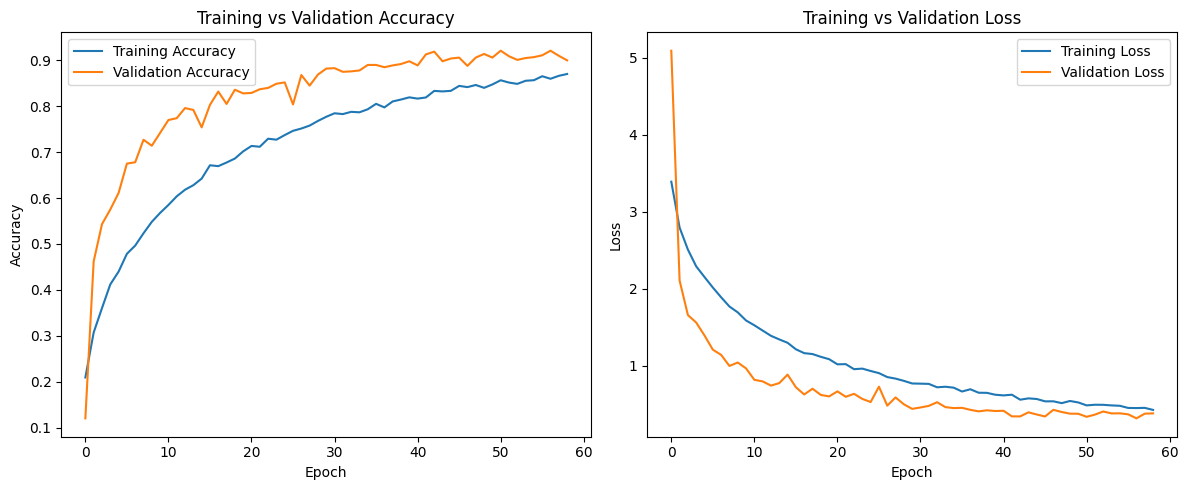

In [17]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

In [18]:
train_loss, train_acc = model.evaluate(train_generator)
print(f"Training Accuracy: {train_acc:.4f}")

test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.4f}")

250/250 ━━━━━━━━━━━━━━━━━━━━ 21s 86ms/step - accuracy: 0.9098 - loss: 0.2934
Training Accuracy: 0.9049
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.8647 - loss: 0.5449
Test Accuracy: 0.8991


## Konversi Model

### Menyimpan dalam Format SavedModel (standar TensorFlow)

In [19]:
model.save('model_savedmodel.keras')

### Menyimpan dalam Format TJFS

In [20]:
model.export('saved_model_dir')
tfjs.converters.save_keras_model(model, 'tfjs_model')
!tensorflowjs_converter --input_format=tf_saved_model --output_format=tfjs_graph_model saved_model_dir tfjs_model/

Saved artifact at 'saved_model_dir'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 50), dtype=tf.float32, name=None)
Captures:
  137077849542672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137077849544784: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137077849539216: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137077849543632: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137077849544592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137077849544208: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137077849541136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137075765324944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137075765325328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137075765324176: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137075765325136:

failed to lookup keras version from the file,
    this is likely a weight only file
2025-05-05 05:08:06.955152: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746421686.976049    8878 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746421686.982834    8878 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
2025-05-05 05:08:11.555303: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
I0000 00:00:174642

### Menyimpan dalam Format TF-Lite

In [21]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmpqup1rp3t'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 50), dtype=tf.float32, name=None)
Captures:
  137077849542672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137077849544784: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137077849539216: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137077849543632: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137077849544592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137077849544208: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137077849541136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137075765324944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137075765325328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137075765324176: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137075765325136

## Inference (Optional)

Saving minibus.png to minibus.png


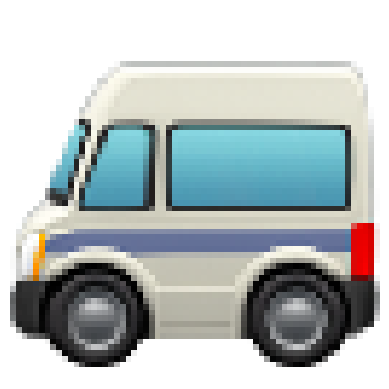

Predicted Class: vehicle, Confidence: 100.00%


In [22]:
interpreter = tf.lite.Interpreter(model_path='model.tflite')
interpreter.allocate_tensors()
def load_image(image_path, target_size=(64, 64)):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=target_size)
    return np.expand_dims(tf.keras.preprocessing.image.img_to_array(img), axis=0)
def get_class_names(train_dir):
    return sorted(os.listdir(train_dir))

def predict_image(image_path, class_names):
    input_data = load_image(image_path)

    input_details, output_details = interpreter.get_input_details(), interpreter.get_output_details()
    interpreter.set_tensor(input_details[0]['index'], input_data)
    interpreter.invoke()
    output_data = interpreter.get_tensor(output_details[0]['index'])
    plt.imshow(input_data[0].astype(np.uint8))
    plt.axis('off')
    plt.show()
    predicted_class = np.argmax(output_data)
    print(f'Predicted Class: {class_names[predicted_class]}, Confidence: {np.max(output_data) * 100:.2f}%')

uploaded = files.upload()
image_path = next(iter(uploaded))

train_dir = '/content/dataset_split/train'
predict_image(image_path, get_class_names(train_dir))